In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
raw_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df = raw_data.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
sns.set()

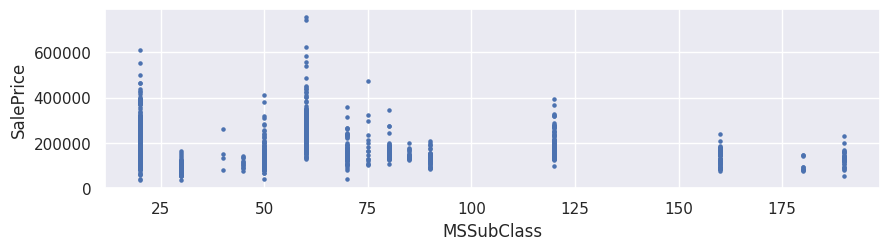

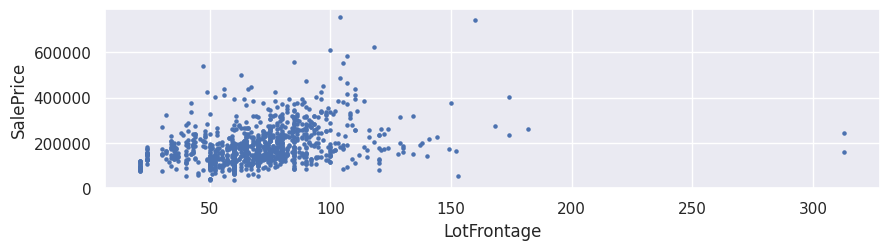

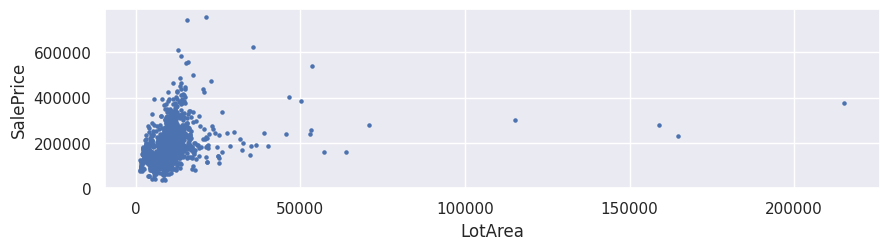

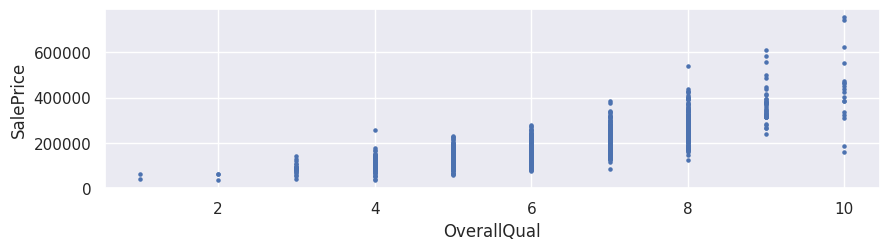

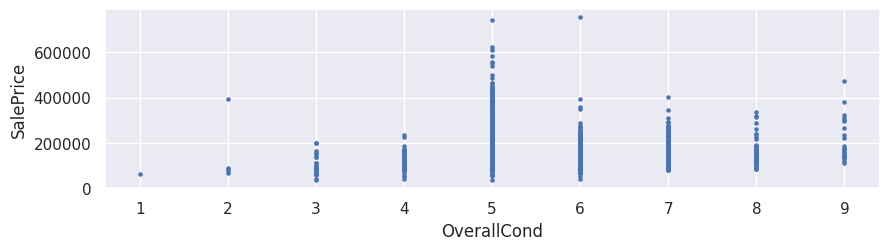

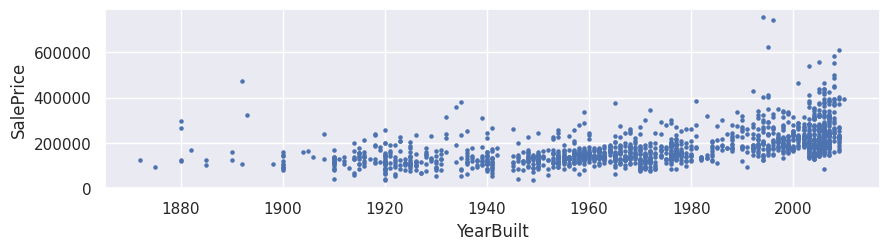

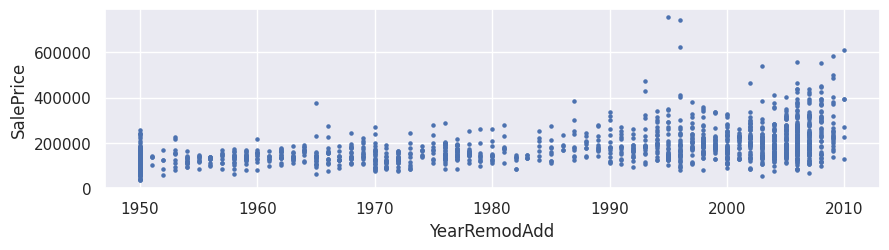

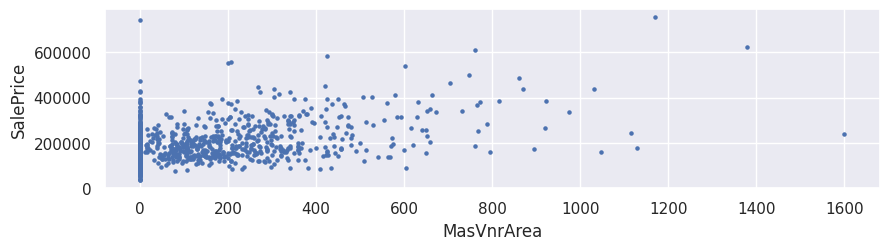

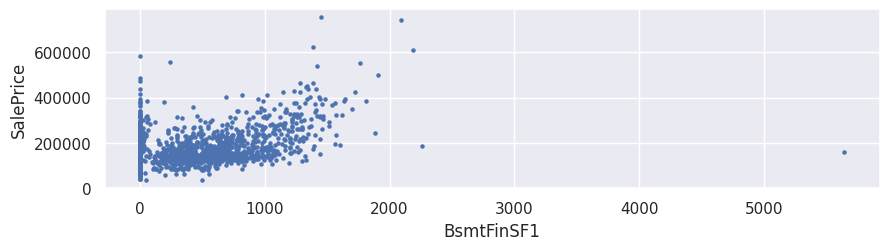

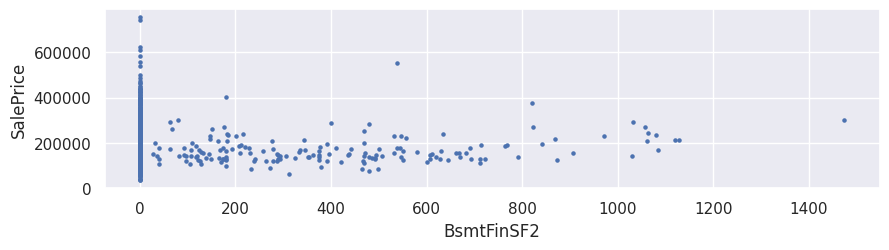

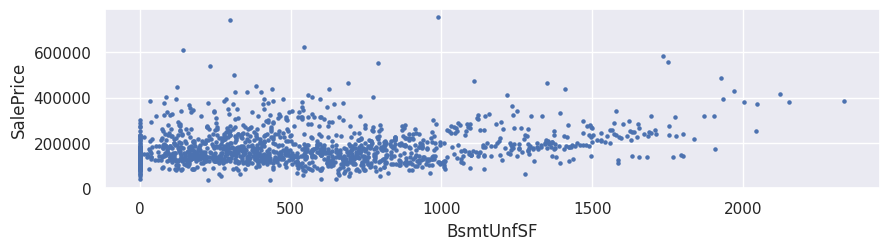

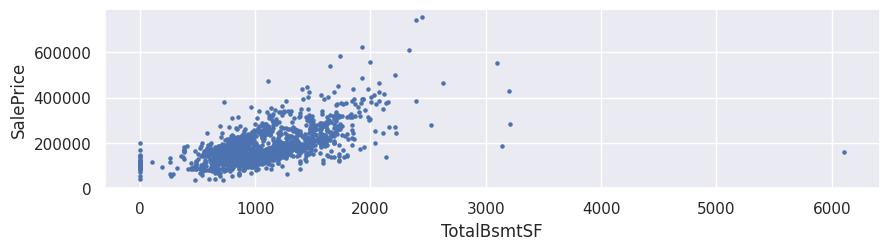

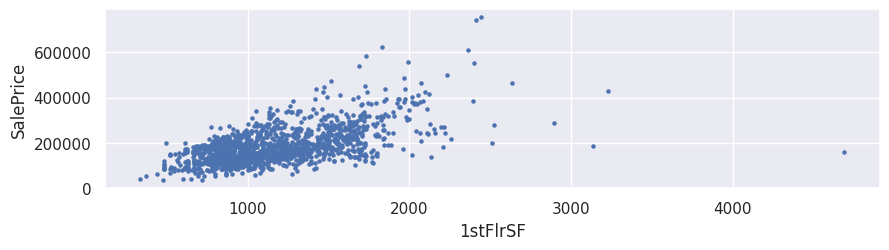

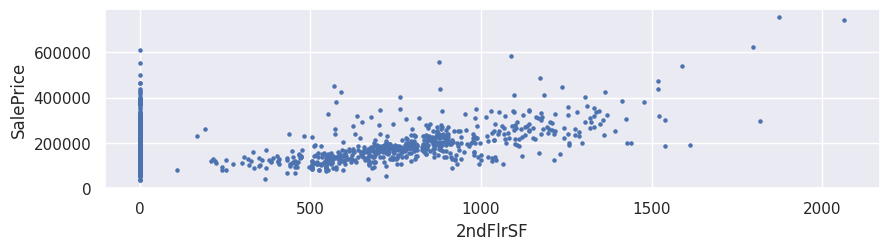

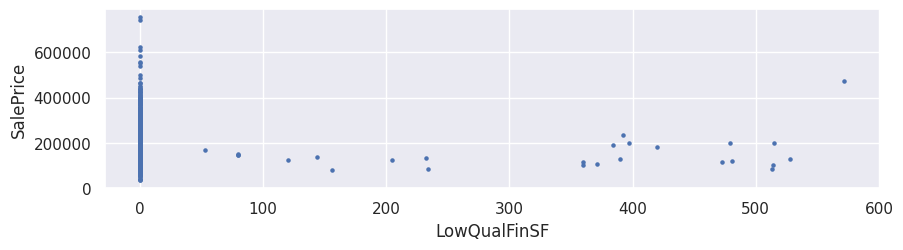

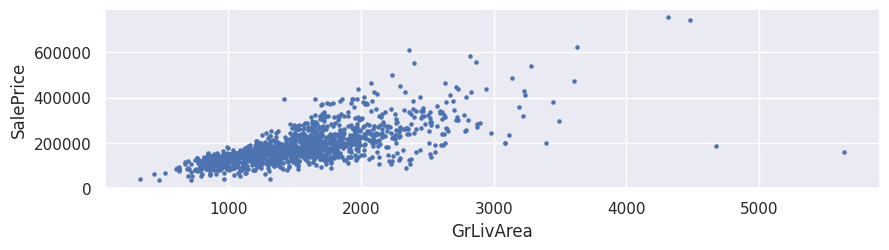

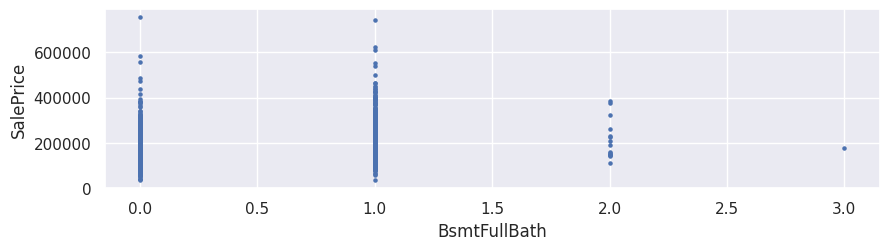

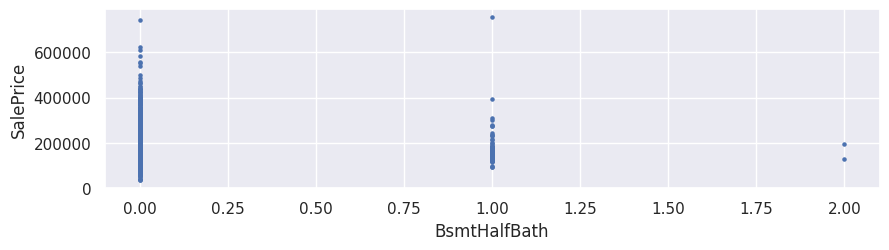

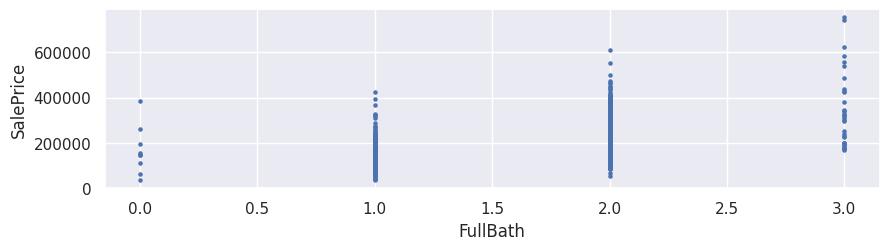

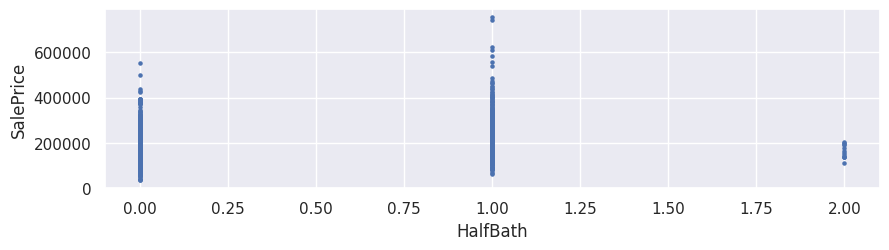

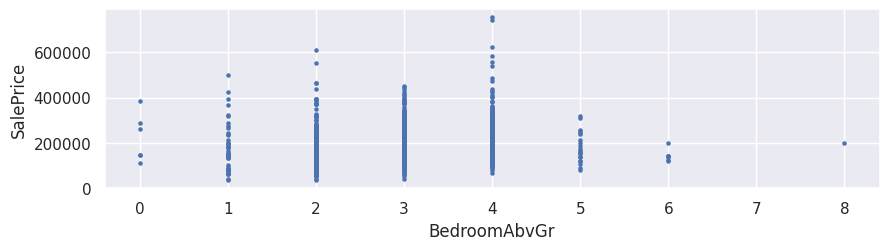

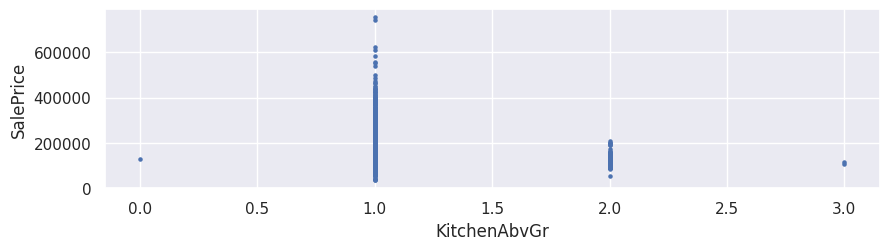

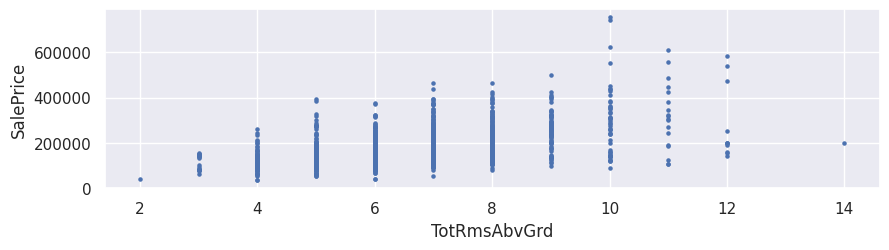

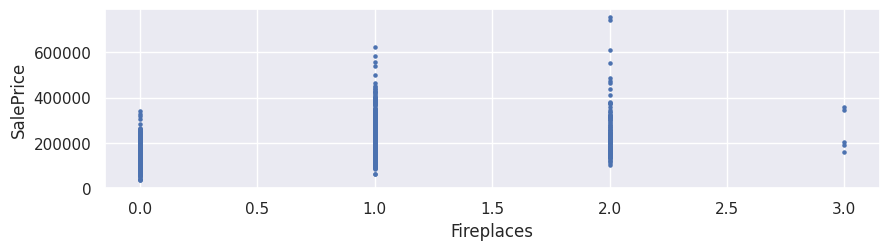

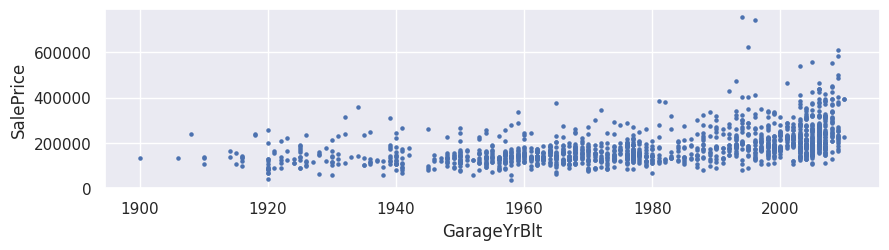

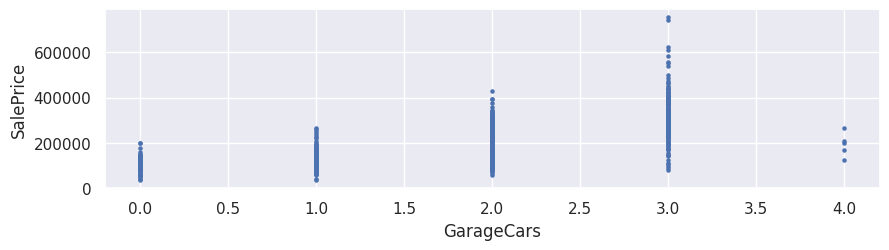

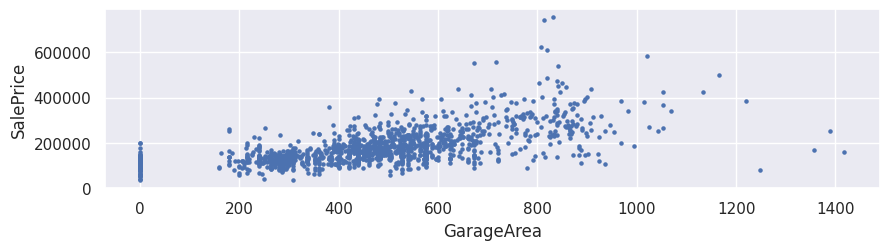

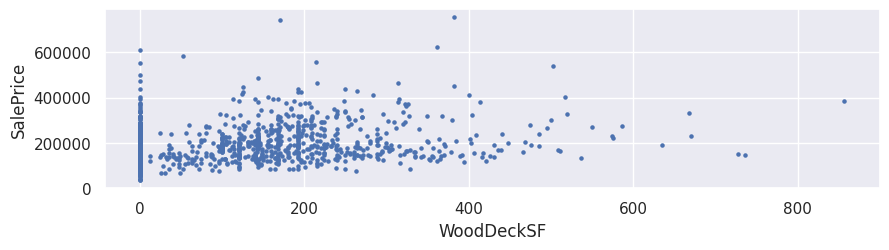

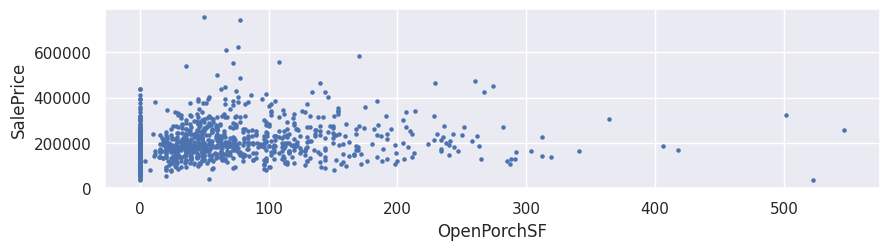

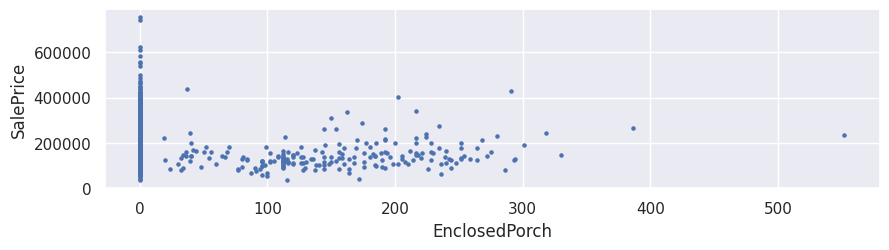

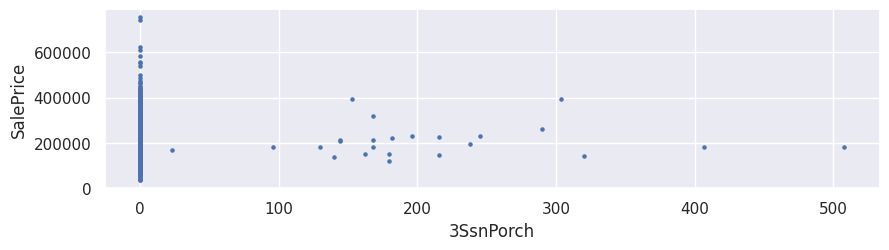

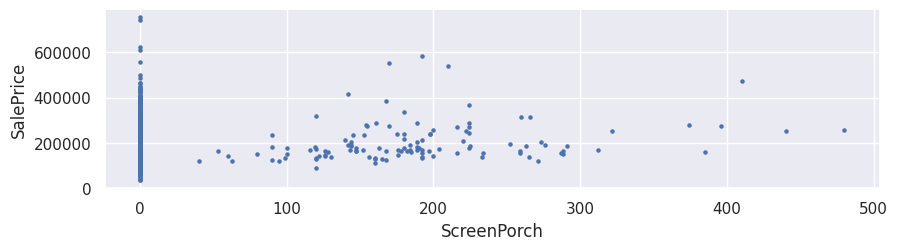

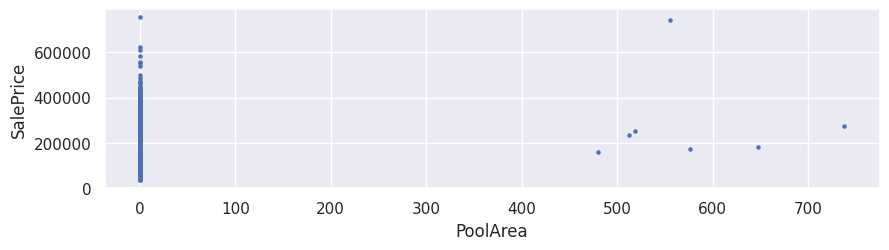

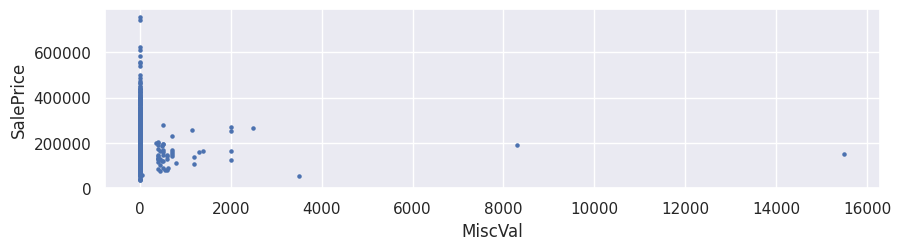

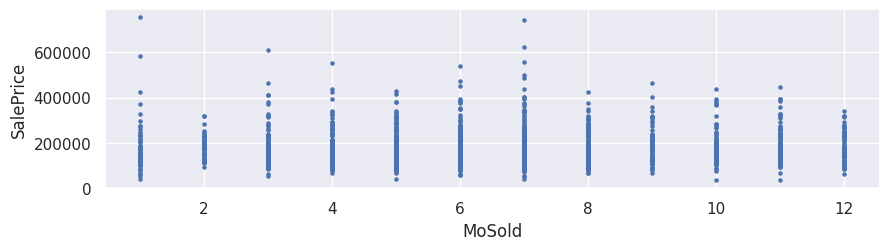

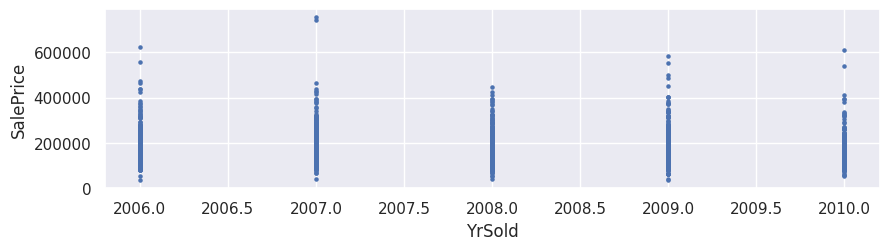

<Figure size 640x480 with 0 Axes>

In [6]:
num_col_sel = selector(dtype_exclude='object')
num_col = num_col_sel(df)

for column,i in zip(num_col[1:-1],range(len(num_col[1:-1]))):
    plt.figure(figsize=(10,100))
    plt.subplot(len(num_col[1:-1]),1,i+1)
    plt.scatter(df[column],df['SalePrice'], s=5)
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()

plt.tight_layout()

In [7]:
def split_X_y(df):
    X = df.drop('SalePrice',axis=1)
    y = df['SalePrice']
    return X,y

In [8]:
class preprocessor:
    
    def __init__(self):
        self.Output_dataframe = None
        self.categorical_columns = []
        self.numerical_columns = []
        self.discrete_numerical_columns = []
        
        
    def preprocess_dataframe(self,df):
        #Drop id column
        df.drop(['Id'],axis=1,inplace=True)

        #Convert 'MSSubClass' and 'MoSold' to categorical features
        df['MSSubClass'] = df['MSSubClass'].apply(lambda x: str(x))
        df['MoSold'] = df['MoSold'].apply(lambda x: str(x))
        
        #Define year-related features
        year_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
    
        #Convert year feature to age feature
        for column in year_columns:
            new_name = 'AgeOf'+column
            df[new_name] = df[column].apply(lambda x: (dt.datetime.now().year-x))
            df.drop(column,axis=1,inplace=True)
            
        self.Output_dataframe = df
    
        #Define discrete numerical features
        discrete_numerical_columns = ['OverallQual','OverallCond','BsmtFullBath',
                              'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces']
    

        #Split Categorical and numerical features
        categorical_column_selector = selector(dtype_include='object')
        numerical_column_selector = selector(dtype_exclude='object')
    
        categorical_columns = categorical_column_selector(df)
        numerical_columns = numerical_column_selector(df)
    
        #Remove discrete numerical features from numerical features
        numerical_columns = [x for x in numerical_columns if x not in discrete_numerical_columns]
    
        #Confirm the total number of features matches the number of features in df
        try:
            total = len(categorical_columns) + len(numerical_columns) + len(discrete_numerical_columns)
            if total != len(df.columns):
                raise ValueError(f"Total number of columns not matching, expected {len(df.columns)}, got {total}")
        except ValueError as ve:
            print(ve)
            
        self.categorical_columns = categorical_columns
        self.numerical_columns = numerical_columns
        self.discrete_numerical_columns = discrete_numerical_columns

        return self.Output_dataframe

In [9]:
def generate_pipeline(categorical_columns,numerical_columns,discrete_numerical_columns):
            
    #Define preprocessing pipeline
    numerical_transformer = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler()),
        ('pca',PCA())
    ])

    discrete_numerical_transformer = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('scaler',StandardScaler()),
        ('pca',PCA())
    ])

    categorical_transformer = Pipeline([
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num',numerical_transformer,numerical_columns),
        ('discrete_num',discrete_numerical_transformer,discrete_numerical_columns),
        ('cat',categorical_transformer,categorical_columns)
    ])
    
    pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',SGDRegressor(max_iter=50000,warm_start=True,fit_intercept=True))
    ])
    return pipe

In [10]:
df = raw_data.copy()
X,y = split_X_y(df)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
# X_train, categorical_columns, numerical_columns, discrete_numerical_columns = preprocess(X_train)
# pipe = generate_pipeline(categorical_columns, numerical_columns, discrete_numerical_columns)
pp = preprocessor()
X_train_pp = pp.preprocess_dataframe(X_train)
pipe = generate_pipeline(pp.categorical_columns,pp.numerical_columns,pp.discrete_numerical_columns)
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'GarageCars',
                                                   'GarageArea', 'WoodDeck...
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir', ...])])),
                ('regressor', SGDRegressor(max_iter=50000, warm_start=True))])

In [11]:
param_grid = {
    'regressor__loss':['squared_error','huber'],
    'regressor__penalty': ['l2','l1','elasticnet'],
    'regressor__alpha': [0.001,0.01,0.1],
    'regressor__l1_ratio':[0.10,0.15,0.25],
    'regressor__learning_rate':['constant','optimal','invscaling']
}

random_search = RandomizedSearchCV(pipe,param_grid,n_jobs=-1,cv=4)
random_search.fit(X_train_pp,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stocha

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('pca',
                                                                                                PCA())]),
                                                                               ['LotFrontage',
                                                                                'LotArea',
                                                                                'MasVnrArea',
                                                                                'BsmtFinSF1',
                                                                                'BsmtFinSF2',
                                                                                'BsmtUnfSF',
                                                                                'TotalBsmtSF',
                                                                                '1stFlrSF',
                                                                                '2ndFlrSF',
                                                                                'LowQualFinSF',
                                                                                'GrLivArea',
                                                                                '...
                                                                                'HeatingQC',
                                                                                'CentralAir', ...])])),
                                             ('regressor',
                                              SGDRegressor(max_iter=50000,
                                                           warm_start=True))]),
                   n_jobs=-1,
                   param_distributions={'regressor__alpha': [0.001, 0.01, 0.1],
                                        'regressor__l1_ratio': [0.1, 0.15,
                                                                0.25],
                                        'regressor__learning_rate': ['constant',
                                                                     'optimal',
                                                                     'invscaling'],
                                        'regressor__loss': ['squared_error',
                                                            'huber'],
                                        'regressor__penalty': ['l2', 'l1',
                                                               'elasticnet']})

In [12]:
print(f"Best params: {random_search.best_params_}")
print(f"Internal CV score: {random_search.best_score_:.3f}")

Best params: {'regressor__penalty': 'l2', 'regressor__loss': 'squared_error', 'regressor__learning_rate': 'invscaling', 'regressor__l1_ratio': 0.25, 'regressor__alpha': 0.01}
Internal CV score: 0.772


In [13]:
X_test_pp = pp.preprocess_dataframe(X_test)
score = random_search.score(X_test_pp,y_test)
score

0.9016715667834637

In [14]:
X_test_kaggle = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
X_test_kaggle = pp.preprocess_dataframe(X_test_kaggle)
y_test_pred_kaggle = random_search.predict(X_test_kaggle)

sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission=pd.DataFrame()
submission['Id']=sample_submission['Id']
submission['SalePrice']=y_test_pred_kaggle
submission.to_csv('/kaggle/working/submission.csv',index=False)